# NAIVE BAYE'S CLASSIFIER

# TASK A

Divide the Dataset into train, development, test dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_data.csv')

https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pandas

In [3]:
df.head(5)

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill


We can see that we do not have any null values in the dataset.

In [4]:
df.isna().sum()

Unnamed: 0         0
Sentence_id        0
New_Sentence    1113
Type               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60115 entries, 0 to 60114
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    60115 non-null  int64 
 1   Sentence_id   60115 non-null  object
 2   New_Sentence  59002 non-null  object
 3   Type          60115 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
# Remove null values.

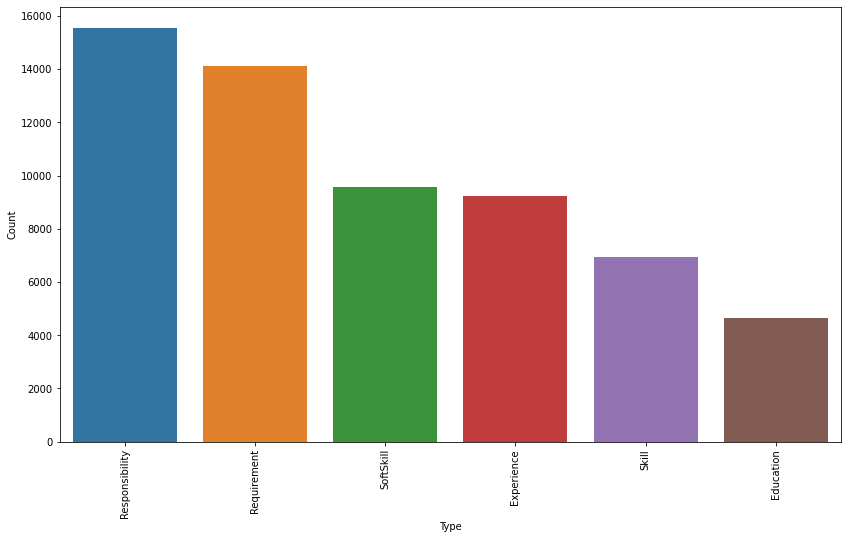

In [7]:
plt.figure(figsize=(14,8))
count = df.Type.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [8]:
df['Type'].value_counts()

Responsibility    15561
Requirement       14132
SoftSkill          9581
Experience         9248
Skill              6956
Education          4637
Name: Type, dtype: int64

Splitting the data into train, validate and test set.

In [9]:
len(df)

60115

In [10]:
train, validate, test_df = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [11]:
print("The length of train data is : ",len(train), "\nThe length of validate data is :",len(validate),"\nThe length of test data is : ",len(test_df))

The length of train data is :  36069 
The length of validate data is : 12023 
The length of test data is :  12023


In [12]:
train

,Unnamed: 0,Sentence_id,New_Sentence,Type
20685,20685,GERRES16518,This individual will lead the long-term strate...,Responsibility
23539,23539,COGSKL7214,Experience in hand-coding JavaScript (ES5/ES6)...,Skill
4159,4159,UAEEXP20392,At least 3-5 years of Leadership experience.,Experience
47568,47568,UAESSK12971,Quick in response.,SoftSkill
59526,59526,INDSKL39779,Experience Working with Modern UI Frameworks ...,Skill
...,...,...,...,...
30232,30232,HONRES46063,Sicherer Umgang mit den Betriebssystem MS- Win...,Responsibility
32360,32360,COGEXP29146,5+ years of experience in managing people.,Experience
17343,17343,PHERES1589,Drive Certification activities and Certificati...,Responsibility
14384,14384,INDRES48592,Responsible to ensure products are compliance...,Responsibility


In [13]:
train.isna().sum()

Unnamed: 0        0
Sentence_id       0
New_Sentence    671
Type              0
dtype: int64

In [14]:
len(train)

36069

In [15]:
train['Type'].value_counts()

Responsibility    9291
Requirement       8473
SoftSkill         5760
Experience        5561
Skill             4180
Education         2804
Name: Type, dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36069 entries, 20685 to 34745
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    36069 non-null  int64 
 1   Sentence_id   36069 non-null  object
 2   New_Sentence  35398 non-null  object
 3   Type          36069 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12023 entries, 38849 to 39042
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    12023 non-null  int64 
 1   Sentence_id   12023 non-null  object
 2   New_Sentence  11791 non-null  object
 3   Type          12023 non-null  object
dtypes: int64(1), object(3)
memory usage: 469.6+ KB


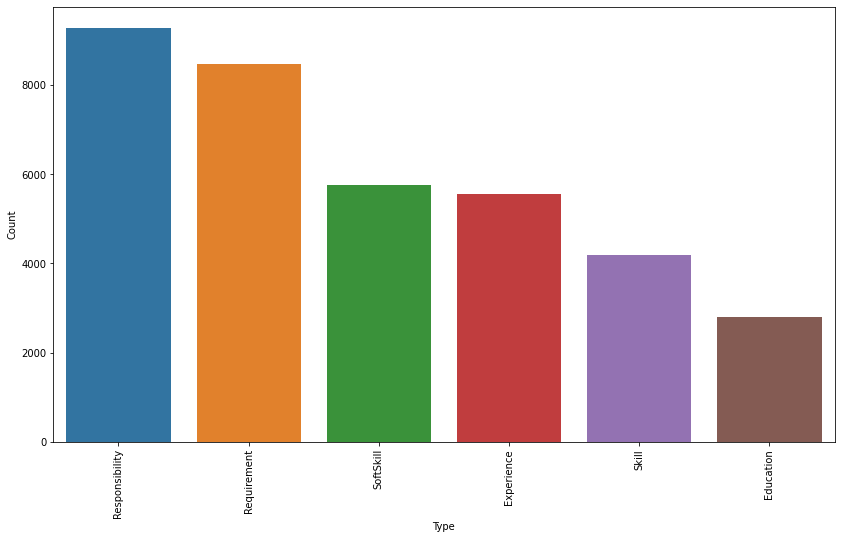

In [18]:
import seaborn as sns
plt.figure(figsize=(14,8))
count = train.Type.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [19]:
#dictionary of all the words and the counts of the words.
def word_counts(data_set) -> list:
  words_in_tuple = dict()
  for i in range(len(data_set)):
    line = data_set['New_Sentence']
    line = line.to_string()
    line = line.strip()
    line = line.lower()
    words = line.split(' ')
    for word in words:
        if word in words_in_tuple:
              words_in_tuple[word] = words_in_tuple[word] + 1
        else:
              words_in_tuple[word] = 1  
    for key in list(words_in_tuple.keys()):  ## creates a list of all keys
      if words_in_tuple[key] < 5:
        del words_in_tuple[key] 
    return (words_in_tuple)
vocab = word_counts(train)

In [20]:
#Conditional count of the words for every label 
# Refrenece blog : https://taherparatha.wordpress.com/portfolio/classifying-news-articles-using-naive-bayes-classifier-from-scratch/
import re
categories = df['Type'].unique()
def conditional_count_values(dataset,label):  
  word_count = {}
  for cat in categories:
    word_dict = {}
    data = df[df[label] == cat]['New_Sentence']
    for row in data:
      words = list(set(re.split("[^a-zA-Z]",str(row))))
      for word in words:
        word = word.lower()
        if word in word_dict:
          word_dict[word] = word_dict[word]+1
        else:
          word_dict[word] = 1
    for word, count in dict(word_dict).items():
      if (len(word)<3) or (count<4):
        word_dict.pop(word)
    word_count[cat] = word_dict
  return pd.DataFrame(word_count).fillna(0)


In [21]:
#returns the probability of the word with total number of docs.
def probability_of_word_in_all_documents(dataset,word_given,smoothing):
  return((word_counts(dataset)[word_given] + smoothing )/(len(dataset) + (len(dataset['Type'].unique()) * smoothing)))

In [22]:
#conditional probability value
def conditional_probability(dataset,word,category,smoothing):
  conditional_value_dataframe = conditional_count_values(train,'Type')
  probability_value = (conditional_value_dataframe.loc[word,category])*smoothing / ((conditional_value_dataframe[category].sum()) + (smoothing * len(conditional_value_dataframe[category])))
  return probability_value

In [23]:
def count_probability_class(category_set):
  result_probabilty = category_set.groupby('Type').size().div(len(category_set)) #count()['category']/len(category)
  return(result_probabilty)

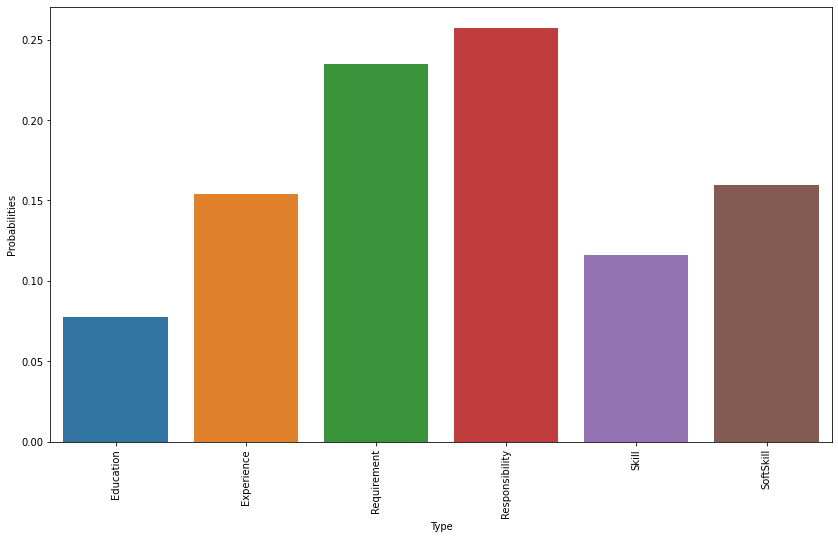

In [24]:
result_probabilty = train.groupby('Type').size().div(len(train)) #count()['category']/len(category)
plt.figure(figsize=(14,8))
sns.barplot(x=result_probabilty.index, y=result_probabilty)
plt.xlabel('Type')
plt.ylabel('Probabilities')
plt.xticks(rotation=90);
plt.show()

In [25]:
def nb_probability(word,data,category,smoothing):
  final_prob = conditional_probability(data,word,category,smoothing) * count_probability_class(data)
  #print(final_prob[category])
  return final_prob[category]

Training the set

In [26]:
vocab_train = word_counts(train)
cond_words_train = conditional_count_values(train,'Type')
cond_words_train.dropna()

,Responsibility,Requirement,Skill,SoftSkill,Education,Experience
high,239.0,229.0,69.0,229.0,109.0,87.0
technical,903.0,515.0,221.0,254.0,305.0,443.0
and,10634.0,7114.0,2640.0,5286.0,597.0,2933.0
architecture,192.0,146.0,93.0,31.0,32.0,133.0
ensuring,199.0,10.0,0.0,10.0,0.0,5.0
...,...,...,...,...,...,...
pan,0.0,0.0,0.0,0.0,0.0,4.0
redhat,0.0,0.0,0.0,0.0,0.0,4.0
marts,0.0,0.0,0.0,0.0,0.0,4.0
manufactory,0.0,0.0,0.0,0.0,0.0,4.0


In [27]:
probability_of_word_in_all_documents(train,"systems",1)  

0.0062092862092862095

In [ ]:
# Create a list of laplcae values, and then use iterateive values into the conditional probability function, and return which value if i, gives max probability.

In [28]:
print("When smoothing factor = 1 : ",conditional_probability(train,"the",'Education',1))
print("When smoothing factor = 0.1 : ",conditional_probability(train,"the",'Education',0.1))
print("When smoothing factor = 0.5 : ",conditional_probability(train,"the",'Education',0.5))

When smoothing factor = 1 :  0.006664775950085082
When smoothing factor = 0.1 :  0.0007682952346079406
When smoothing factor = 0.5 :  0.0035972324271369093


In [29]:
class_train_probability = count_probability_class(train)

In [30]:
nb_probability("the",train,'Education',1)

0.000518118932158878

In [31]:
nb_probability("the",train,'Education',0.1)

5.972718505754707e-05

In [32]:
for i in train['Type'].unique():
  print(nb_probability("the",train,i,0.1))

0.0007705207223853557
0.00011487546606727607
0.00015029559868622928
0.00021838500703810006
0.000413953687759016
5.972718505754707e-05


In [33]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [34]:
for train,validate in cv.split(df):
  print("Train Score = ",train,"Validation Score : ",validate)

Train Score =  [    0     1     2 ... 60112 60113 60114] Validation Score :  [   10    12    28 ... 60096 60099 60109]
Train Score =  [    0     1     4 ... 60112 60113 60114] Validation Score :  [    2     3     8 ... 60091 60094 60103]
Train Score =  [    1     2     3 ... 60110 60113 60114] Validation Score :  [    0    21    22 ... 60108 60111 60112]
Train Score =  [    0     2     3 ... 60112 60113 60114] Validation Score :  [    1     4     5 ... 60105 60106 60110]
Train Score =  [    0     1     2 ... 60110 60111 60112] Validation Score :  [    9    14    15 ... 60104 60113 60114]


# TEST DATA

In [35]:
vocab_test = word_counts(test_df)
cond_words_test = conditional_count_values(test_df,'Type')
cond_words_test.dropna()

,Responsibility,Requirement,Skill,SoftSkill,Education,Experience
high,239.0,229.0,69.0,229.0,109.0,87.0
technical,903.0,515.0,221.0,254.0,305.0,443.0
and,10634.0,7114.0,2640.0,5286.0,597.0,2933.0
architecture,192.0,146.0,93.0,31.0,32.0,133.0
ensuring,199.0,10.0,0.0,10.0,0.0,5.0
...,...,...,...,...,...,...
pan,0.0,0.0,0.0,0.0,0.0,4.0
redhat,0.0,0.0,0.0,0.0,0.0,4.0
marts,0.0,0.0,0.0,0.0,0.0,4.0
manufactory,0.0,0.0,0.0,0.0,0.0,4.0


In [36]:
print("When smoothing factor = 1 : ",conditional_probability(test_df,"the",'Education',1))
print("When smoothing factor = 0.1 : ",conditional_probability(test_df,"the",'Education',0.1))
print("When smoothing factor = 0.5 : ",conditional_probability(test_df,"the",'Education',0.5))

When smoothing factor = 1 :  0.006664775950085082
When smoothing factor = 0.1 :  0.0007682952346079406
When smoothing factor = 0.5 :  0.0035972324271369093


In [37]:
class_test_probability = count_probability_class(test_df)
class_test_probability

Type
Education         0.077851
Experience        0.152957
Requirement       0.234883
Responsibility    0.259004
Skill             0.115861
SoftSkill         0.159444
dtype: float64

In [38]:
nb_probability("the",test_df,'Education',1)

0.0005188580461847822

In [39]:
for i in test_df['Type'].unique():
  print(nb_probability("the",test_df,i,0.1))

0.0007747502516977713
0.0004139048321367147
0.00021804378046460303
0.00011484798389836046
0.00014910642293686872
5.981238788929821e-05
